# Binary Classification
1. become one with data(visualize)
2. preprocess the data(the main step here was scaling/normalizing)
3. created a model
4. fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. repet until satisfied(experiment,experiment,experiment)

In [ ]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close

--2025-06-19 21:46:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   108MB/s    in 1.0s    

2025-06-19 21:46:22 (108 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

In [ ]:
# get the class name
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names.tolist()

In [ ]:
 import os
 for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directiories and {len(filenames)} in images {dirpath}")

there are 2 directiories and 0 in images pizza_steak
there are 2 directiories and 0 in images pizza_steak/test
there are 0 directiories and 250 in images pizza_steak/test/steak
there are 0 directiories and 250 in images pizza_steak/test/pizza
there are 2 directiories and 0 in images pizza_steak/train
there are 0 directiories and 750 in images pizza_steak/train/steak
there are 0 directiories and 750 in images pizza_steak/train/pizza


1.  become one with data

In [ ]:
# visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape : {img.shape}")
  return img

image shape : (512, 512, 3)
image shape : (512, 512, 3)


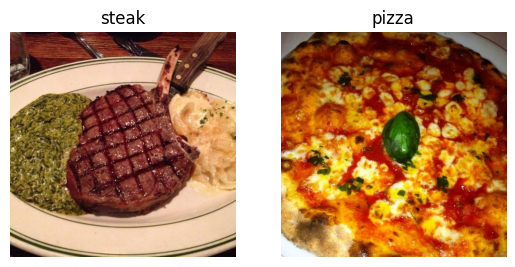

In [ ]:
# visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

2. preprocess the data

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary") # Changed train_data to train_dir
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# create the model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
TensorBoard_callback = TensorBoard(log_dir="./logs")
model=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3),padding="valid",strides=1),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2,padding="valid"),
    Flatten(),
    Dense(1,activation="sigmoid")

])
model.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),callbacks=[TensorBoard_callback])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6840 - loss: 0.5780

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.6847 - loss: 0.5772 - val_accuracy: 0.8520 - val_loss: 0.3635
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.8507 - loss: 0.3853 - val_accuracy: 0.8440 - val_loss: 0.3495
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8611 - loss: 0.3434 - val_accuracy: 0.8260 - val_loss: 0.3571
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8999 - loss: 0.2820 - val_accuracy: 0.8660 - val_loss: 0.3135
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9324 - loss: 0.1994 - val_accuracy: 0.8700 - val_loss: 0.3038


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118810)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       118,811 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,735 (1.38 MB)

 Trainable params: 120,911 (472.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 241,824 (944.63 KB)

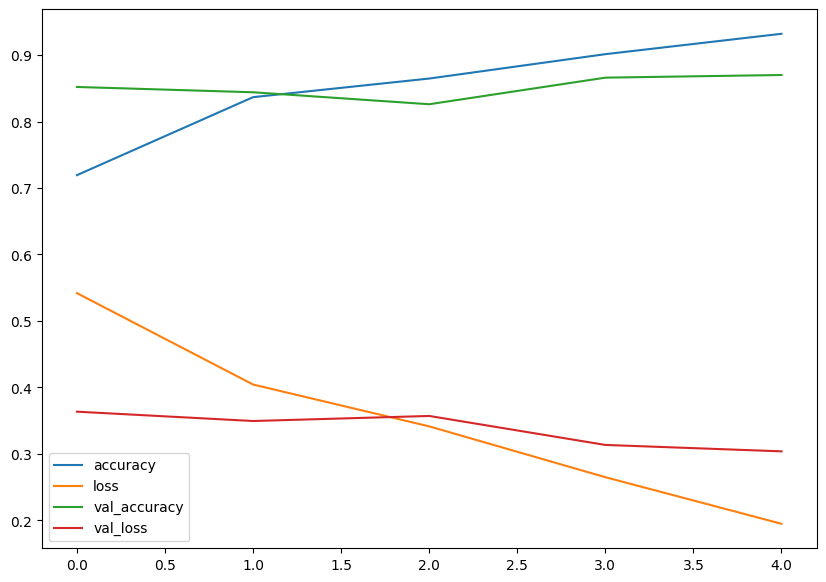

In [ ]:
 import pandas as pd
 pd.DataFrame(history.history).plot(figsize=(10,7));

# evaluating our model

In [ ]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

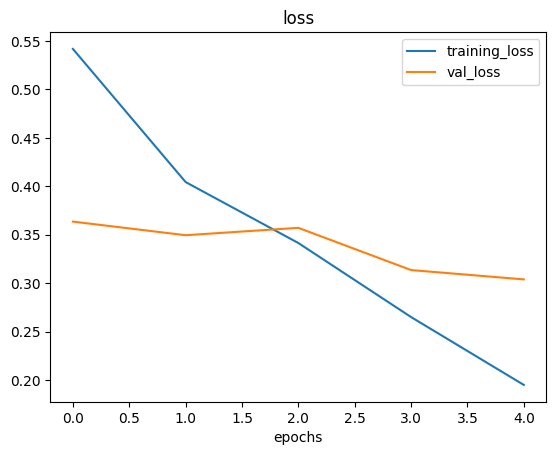

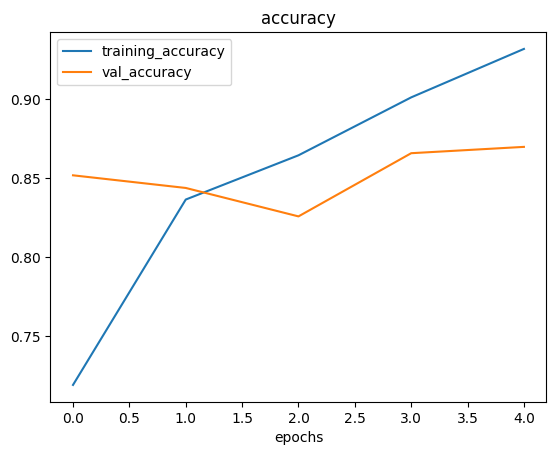

In [ ]:
plot_loss_curves(history)

In [ ]:
model_1=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")






])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [ ]:
history_1=model_1.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.5957 - loss: 0.6691 - val_accuracy: 0.7640 - val_loss: 0.5005
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7736 - loss: 0.4909 - val_accuracy: 0.8360 - val_loss: 0.3900
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8125 - loss: 0.4158 - val_accuracy: 0.8640 - val_loss: 0.3451
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8395 - loss: 0.3883 - val_accuracy: 0.8420 - val_loss: 0.3528
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8491 - loss: 0.3496 - val_accuracy: 0.8780 - val_loss: 0.3091


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

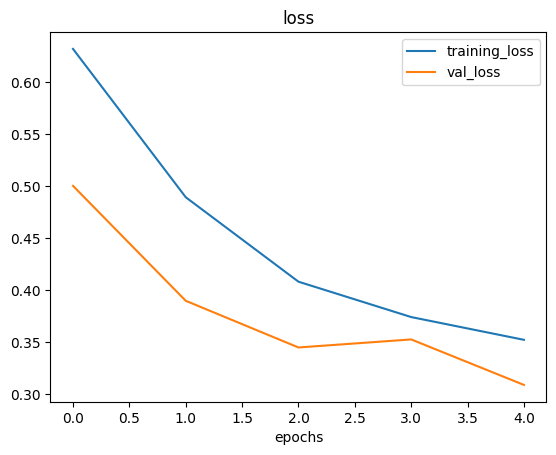

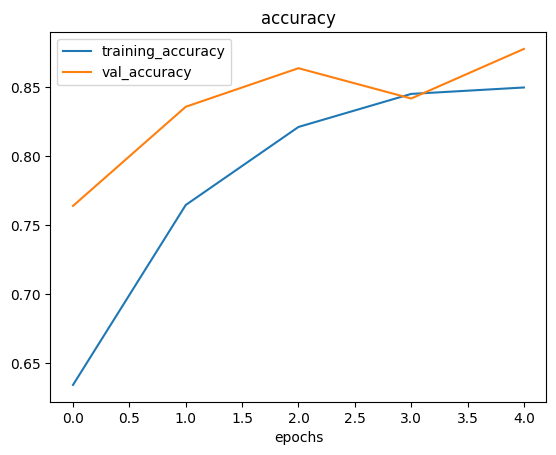

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = next( train_data)
augmented_images, augmented_labels =next(train_data_augmented) # Note: labels aren't augmented, they stay the same

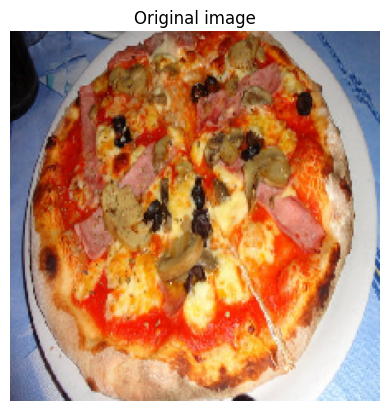

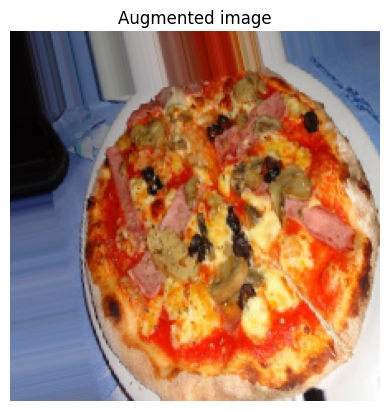

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_2=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_2=model_2.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.5506 - loss: 0.9755

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 489ms/step - accuracy: 0.5497 - loss: 0.9731 - val_accuracy: 0.5020 - val_loss: 0.6906
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - accuracy: 0.5624 - loss: 0.6883 - val_accuracy: 0.5040 - val_loss: 0.6882
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.6315 - loss: 0.6864 - val_accuracy: 0.6940 - val_loss: 0.6840
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 466ms/step - accuracy: 0.6100 - loss: 0.6875 - val_accuracy: 0.6120 - val_loss: 0.6729
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 442ms/step - accuracy: 0.6014 - loss: 0.6786 - val_accuracy: 0.7300 - val_loss: 0.6312


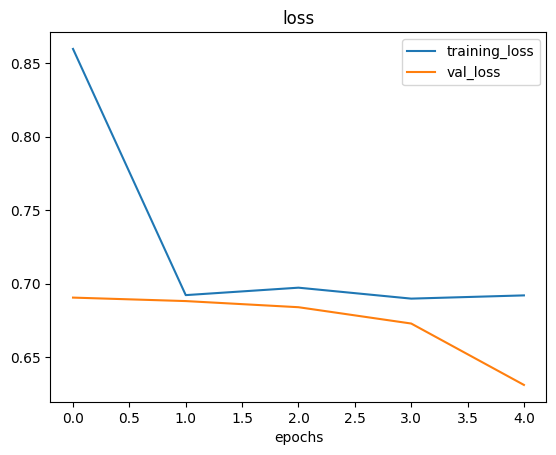

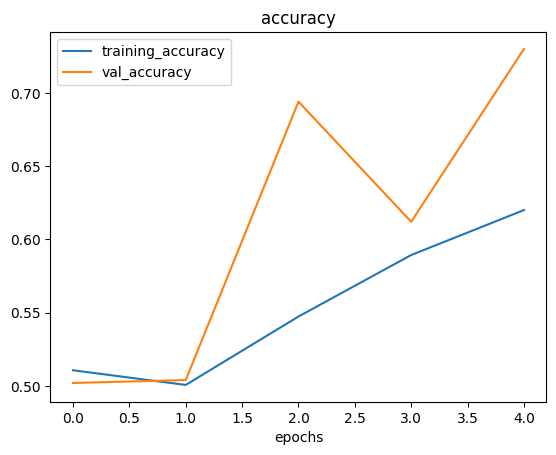

In [ ]:
plot_loss_curves(history_2)

In [ ]:
train_data_augmented_shuffled=ImageDataGenerator(rescale=1/225.,
                                                 rotation_range=0.2,
                                                 shear_range=0.2,
                                                 zoom_range=0.2,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.2,
                                                 horizontal_flip=True,
                                            )
train_data_augmented_shuffled = train_data_augmented_shuffled.flow_from_directory(train_dir,
                                                                                    target_size=(224,224),
                                                                                     batch_size=32,
                                                                                     class_mode="binary",
                                                                                     shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_3=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_3=model_3.fit(train_data_augmented_shuffled,epochs=5,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - accuracy: 0.5566 - loss: 0.7272 - val_accuracy: 0.7600 - val_loss: 0.5950
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.6831 - loss: 0.6006 - val_accuracy: 0.8000 - val_loss: 0.4540
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.7850 - loss: 0.4751 - val_accuracy: 0.8300 - val_loss: 0.3828
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.7762 - loss: 0.4768 - val_accuracy: 0.8420 - val_loss: 0.3809
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 460ms/step - accuracy: 0.7791 - loss: 0.4804 - val_accuracy: 0.8400 - val_loss: 0.3800


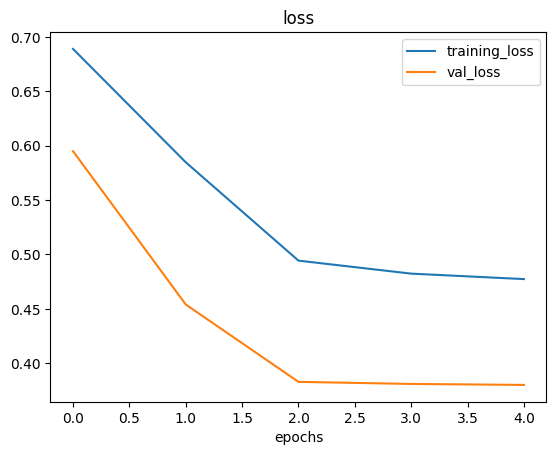

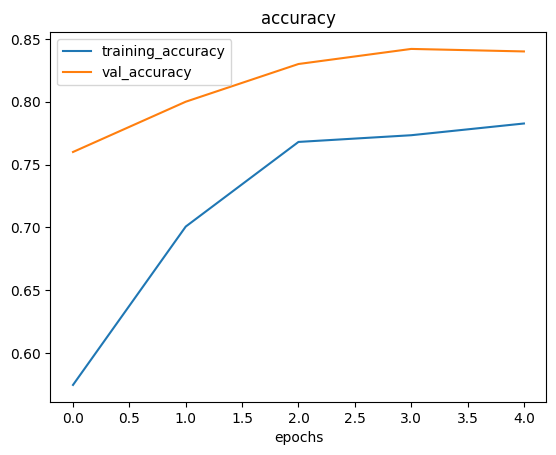

In [ ]:
plot_loss_curves(history_3)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

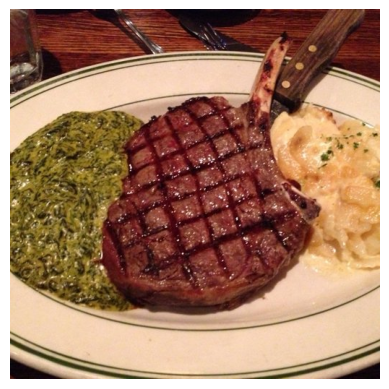

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak=mpimg.imread("/03-steak.jpeg")
plt.imshow(steak_img)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [ ]:
steak=load_and_prep_image("/03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [ ]:
import tensorflow as tf

In [ ]:
pred=model_3.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


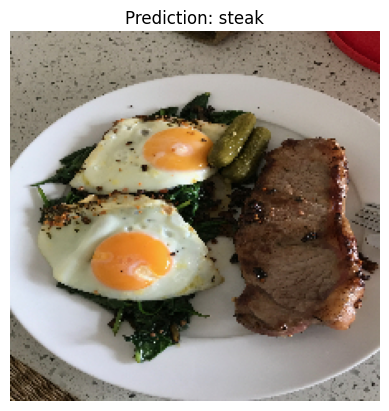

In [ ]:
pred_and_plot(model_)